In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r"C:\Users\22213\OneDrive\Desktop\csv\heart_disease_data.csv")

In [3]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print(df['target'].value_counts())

target
1    165
0    138
Name: count, dtype: int64


<Axes: xlabel='age', ylabel='thalach'>

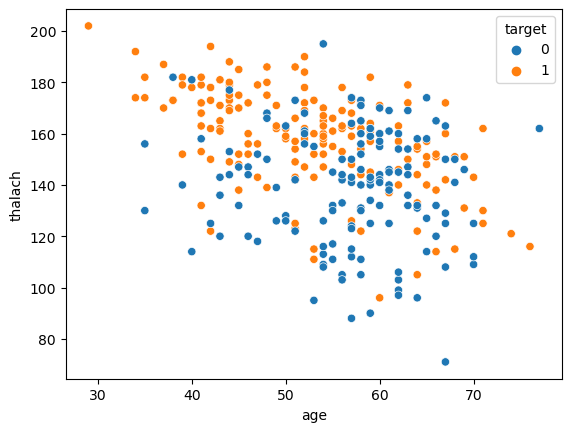

In [24]:
sns.scatterplot(data=df, x='age', y='thalach', hue='target')

In [31]:
c = df.corr()

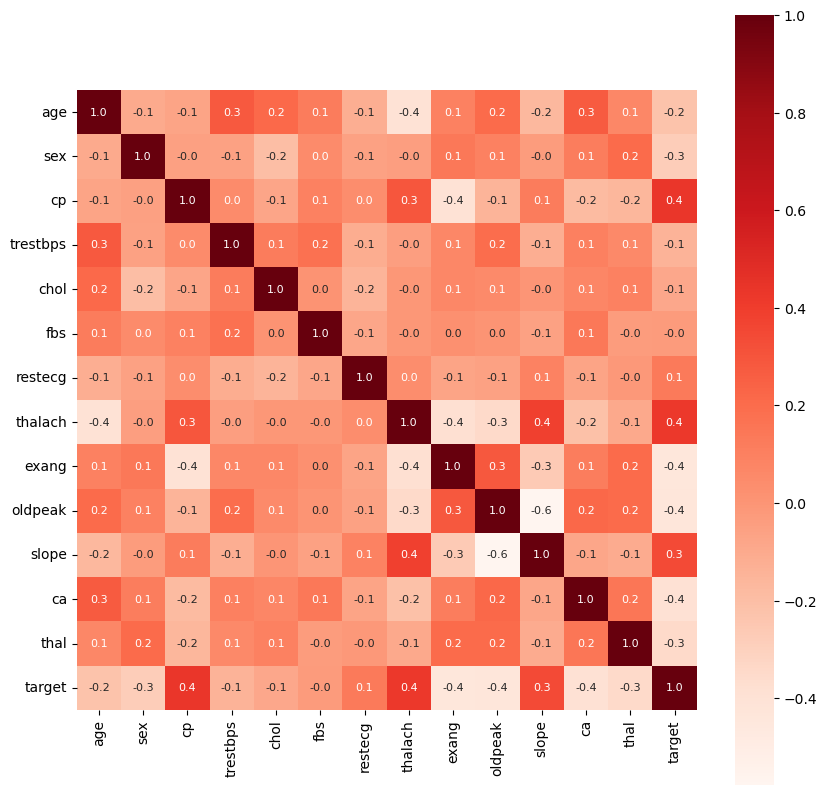

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(data=c, cbar=True, square=True, fmt='0.1f', annot=True, annot_kws={'size':8}, cmap='Reds')
plt.show()

In [7]:
x = df.drop(columns=['target'], axis=1)
y = df['target']

# train_test_split

In [9]:
x_train, x_test, y_train, y_taest = train_test_split(x, y, test_size=.15, stratify=y)

 *comparing the performance of the models*

In [41]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [42]:
def compare_models_train_test_split():
    for model in models:
        model.fit(x_train, y_train)
        test_data_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, test_data_pred)
        print(f'Accuracy score of the {model} = {accuracy}')

In [43]:
compare_models_train_test_split()

Accuracy score of the LogisticRegression(max_iter=1000) = 0.7391304347826086
Accuracy score of the SVC(kernel='linear') = 0.7391304347826086
Accuracy score of the KNeighborsClassifier() = 0.6086956521739131
Accuracy score of the RandomForestClassifier() = 0.7608695652173914


# cross validation

Logistic Regression

In [56]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), x, y, cv=5)
print(cv_score_lr)
print('Mean accuracy LinearRegression:', 100*(round(cv_score_lr.mean(), 4)))

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean accuracy LinearRegression: 82.83


SVC

In [57]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), x, y, cv=5)
print(cv_score_svc)
print('Mean accuracy SVC:', 100*(round(cv_score_svc.mean(), 4)))

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Mean accuracy SVC: 82.83


KNeighborsClassifier

In [58]:
cv_score_knc = cross_val_score(KNeighborsClassifier(), x, y, cv=5)
print(cv_score_knc)
print('Mean accuracy SVC:', 100*(round(cv_score_knc.mean(), 4)))

[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Mean accuracy SVC: 64.39


Random Forest Classifier

In [59]:
cv_score_rf = cross_val_score(RandomForestClassifier(), x, y, cv=5)
print(cv_score_rf)
print('Mean accuracy SVC:', 100*(round(cv_score_rf.mean(), 4)))

[0.81967213 0.90163934 0.80327869 0.81666667 0.76666667]
Mean accuracy SVC: 82.16


**creating a function to compare the models**

In [61]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [68]:
def compare_models_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, x, y, cv=5)
        mean_accuracy = 100*(round(cv_score.mean(), 6))
        print(f'Cross validation mean accuracy of {model} = {mean_accuracy}')
        print('----------------------------------------------------------------------------')

In [69]:
compare_models_cross_validation()

Cross validation mean accuracy of LogisticRegression(max_iter=1000) = 82.82509999999999
----------------------------------------------------------------------------
Cross validation mean accuracy of SVC(kernel='linear') = 82.8306
----------------------------------------------------------------------------
Cross validation mean accuracy of KNeighborsClassifier() = 64.388
----------------------------------------------------------------------------
Cross validation mean accuracy of RandomForestClassifier() = 82.1585
----------------------------------------------------------------------------
